#HW2 - Absorption Spectroscopy

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy
import scipy.constants as spc

An experiment is designed to measure an absorption spectrum using a tungsten-iodine lamp, a 0.5 meter focal length monochromator, and an RCA 1P28 photomultiplier. The tungsten-iodine lamp has a temperature of 3000K and, although the filament is a spiral of tungsten, can be approximated as a rectangular solid that is 1 mm wide, 1 mm deep and 10 mm high. For the purposes of this simulation you can assume it is a black body with a spectral brightness given by

\begin{equation}\Large
B(\lambda,T) = \frac{2hc^2}{\lambda^5\left(e^{\frac{hc}{\lambda k T}}-1\right)}
\end{equation}

where $\lambda$ is the wavelength, $c$ is the speed of light, $k$ is Boltzmann's constant, $h$ is Planck's constant, and $T$ is the teperature. Remember that the spectral brightness is the brightness normalized by the band of frequencies, $\Delta \lambda$.

The light is focused onto the slit of the monochromator with a 25 cm focal length lens located 30 cm from the tungsten lamp. The lens has a 5 cm diameter. The monochromator has enterance and exit slits that are 1 micron wide and 1 mm heigh. The monochromator's bandpass is 0.0158 nm. The f/# of the monochromator is 5.

The light exists the monochromator and passes through the sample before striking the photomultiplier. The sample contains a 10<sup>-4</sup> M concentration of a molecule with an absorption beach at 250 nm a peak optical cross section $\sigma$ of 10<sup>-17</sup> cm<sup>2</sup> and a 0.5 cm pathlength. The absorption sepctrum has a Lorentzian lineshape with a half-width-half-maximum (HWHM), $\Gamma$, of 500 cm<sup>-1</sup>. A Lorentzian line profile is described by the equation

\begin{equation}\Large
\sigma(\omega) = \frac{\sigma_{\mathrm{peak}}\Gamma^2}{(\omega_0 - \omega)^2+\Gamma^2}
\end{equation}

where $\sigma_{\mathrm{peak}}$ is the peak absorption cross-section, $\omega_0$ is the center frequency of the transition, $\omega$ is the frequency of the light, and $\Gamma$ is the HWHM. Note that the use of this formula requires changing wavelength to wavenumbers. The two are related by $\bar{\nu}=\frac{1}{\lambda}$ and $\Delta\bar{\nu}=\frac{\Delta\lambda}{\lambda^2}$.

The intensity of a beam propagating through an absorbing medium is

\begin{equation}\Large
I = I_0 e^{-\sigma(\omega)l N}
\end{equation}

Where $I_0$ and $I$ are the intensity of light into and out of the sample, N is the number density of molecules (molecules/cm<sup>3</sup>) and $l$ is the pathlength in the sample. The absorption spectrum is measured over the wavelength range from 200 to 300 nm. Note that the intensity absorbed is the difference between the light going in and coming out, $(I_0-I)$.

All of the light that passes through the exit slit strikes the photocathode. The 1P28 photomultiplier has a quantum efficiency of 0.21 at 250 nm, a gain of 10<sup>6</sup>, and the detection electronics has an RC time constant of 0.25 seconds. Neglect any dark current.

In [2]:
# Variables:
# monochromator
fm = 0.5 # m focal length
hs = 0.001 # slit height
ws = 1.0e-6 # slit width

# lamp
T = 3000. # K temperature of lamp
wo = 0.001 # m width of lamp
ho = 0.010 # m height of lamp
do = 0.001 # m depth of lamp

# Photomultiplier
G = 10.**6 # gain
nu = 0.21 # quantum efficiency
RC = 0.25 # s RC time constant
bp = 0.0158e-9 # m bandpass


##1
What is the magnification of the optics? (5)

In [3]:
# lens setup and properties
xo = .30 # m
lens_diameter = .05  # m
lens_focal = .25  # m
xi = 1./((1/lens_focal)-(1/xo))

M = xi/xo
print ("Magnification = {}".format(M))

Magnification = 5.0


##2
How far must you place the monochromator from the light sources? (180 cm)

In [4]:
x = xi + xo
print ("distance = {}".format(x))

distance = 1.8


##3
How many 250 nm photons/second are hitting the photomultiplier if the sample is absent? (10<sup>4</sup>)

In [5]:
wav = 2.5e-7 # m wavelength

Bs = 2.*spc.h*spc.c**2./(wav**5*(np.expm1(spc.h*spc.c/(wav*spc.k*T)))) # spectral brightness
Bi = Bs*bp*(wav/(spc.h*spc.c)) # brightness in terms of photon energy

si = (4*np.pi)/(16*(xi/lens_diameter)**2)
sm = (4*np.pi)/(16*fm**2)
sa = np.minimum(si,sm)

signal = Bi*hs*ws*sa
print ("photons/sec = {}".format(signal))

photons/sec = 9867.86499913


##4
What is the current from the photomultiplier in amperes?

In [6]:
e = 1.602e-19 # C charge of e

Np = nu*G*signal*e
print ("current = {} C".format(Np))

current = 3.31974714301e-10 C


##5
What is the minimum absorbance that could be measured at 250 nm? Assume the criterion for minimum detectable absorbance is a S/N of 3.

In [7]:
I_in = Bi*sa
SN = 3
tao = 2*RC
sig = SN**2/(tao*nu)
I_out = sig/(hs*ws)

A = np.log10(I_in/I_out)
print A

2.06116998897


##6
Could you improve your minimum detectable absorbance by changing the position of the monochromator, lens, and light source? Why?

In [8]:
print si
print sm

0.000872664625997
3.14159265359


Yes, you could change the minimum detectable absorbance because right now it is limited by the solid angle of the image, which can be changed by moving the lens, monochromator, or light source.

##7
Plot the photomultiplier current with the sample absent and with it present on the same graph over the 200-300 nm range. Also plot the absorbance, $\log(\frac{I_0}{I})$. Example graphs follow.

<img src="HW2_example.png">

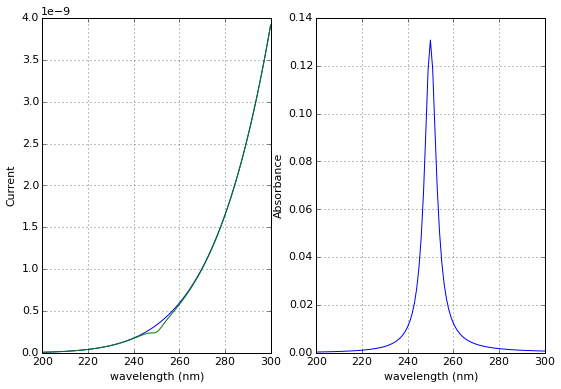

In [9]:
waven = np.linspace(200,300,101)
wave = waven*1.0e-9 # m wavelength

Bs = 2.*spc.h*spc.c**2./(wave**5*(np.expm1(spc.h*spc.c/(wave*spc.k*T)))) # spectral brightness
Bi = Bs*bp*(wave/(spc.h*spc.c)) # brightness in terms of photon energy

si = (4.*np.pi)/(16.*(xi/lens_diameter)**2)
sm = (4.*np.pi)/(16.*fm**2)
sa = np.minimum(si,sm)


# sample line shape, all in cm
cross = 1.0e-17
w0 = 1./250.0e-7
w = 1./(wave*1.0e2)
HWHM = 500
lor = cross*HWHM**2/((w0-w)**2+HWHM**2)
I0 = sa*Bi
l = 0.5
C = 1.0e-4/1000 #mols/mL
Av = 6.022e23 #molec/mol
N = C*Av
I = I0*np.exp(-lor*l*N)

signal = Bi*hs*ws*sa
ssample = hs*ws*sa*I/sa

Np = nu*G*signal*e
Npsample = nu*G*ssample*e

A = np.log10(I0/I)

plt.subplot(121)
plt.plot(waven,Np)
plt.plot(waven,Npsample)
plt.xlabel('wavelength (nm)')
plt.ylabel('Current')
plt.grid()

plt.subplot(122)
plt.plot(waven,A)
plt.xlabel('wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid()

##8
Plot the same graphs but include the noise expected if shot noise from the photocathode dominates the measurement. To do this, create a normal (Gaussian) distribution with the standard deviation of your measurement variable. You will see that the noise in the absorbance is much larger at small wavelengths. Why?

To create the noise array, use the np.random.normal method. An example is given. Remember to ensure that the noise in $I_0$ and $I$ are not correlated by using two seperate calls to the random method.

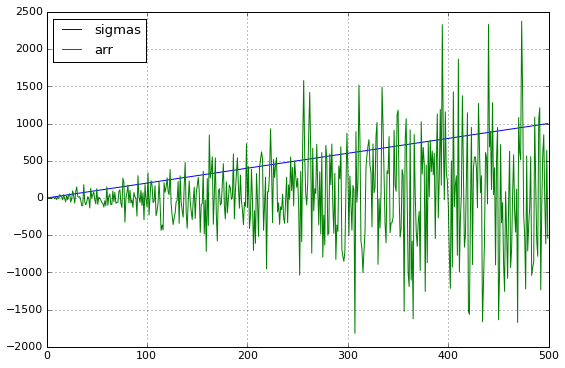

In [10]:
shape = 500
sigmas = np.linspace(1e-3, 1e3, shape)  # you may define a different standard deviation for each element
arr = np.random.normal(0, sigmas, shape)
plt.plot(sigmas)
plt.plot(arr)
plt.legend(['sigmas', 'arr'], loc='best')
plt.grid()

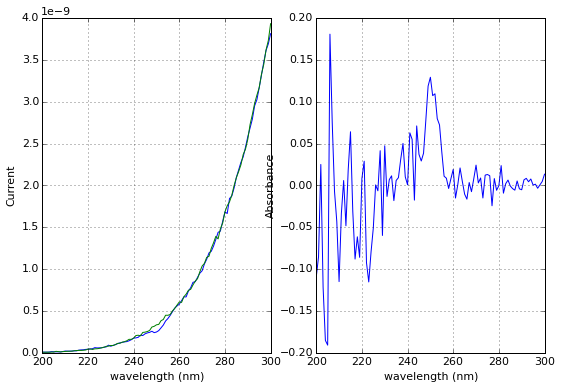

In [11]:
signal_noise = (signal*nu*tao)**0.5
ssignal_noise = (ssample*nu*tao)**0.5

arr_s = np.random.normal(signal_noise**2,signal_noise)
arr_ss = np.random.normal(ssignal_noise**2,ssignal_noise)

current_blank = arr_s*e*G/tao
current_sample = arr_ss*e*G/tao

plt.subplot(121)
plt.plot(waven,current_sample)
plt.plot(waven,current_blank)
plt.xlabel('wavelength (nm)')
plt.ylabel('Current')
plt.grid()

I0_n = (current_blank/(nu*G*e))/(hs*ws)
I_n = (current_sample/(nu*G*e))/(hs*ws)

Abs = np.log10(I0_n/I_n)

plt.subplot(122)
plt.plot(waven,Abs)
plt.xlabel('wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid()

The noise in the absorbance is higher at lower wavelengths because the number of events (photons/sec, or equivalently current) is lower at lower wavelengths. This greatly increases the effect of a single random event on the signal.